# Finance using Python and Machine Learning by [eestra2](https://github.com/eestra2)

### An introductory walk-through of Python coding to facilitate financial analysis. 

#### This notebook was created with two major intentions:

1. I created this notebook to help me solidify my understanding of using python coding to collect, organize, and analyze financial information. I could not continue calling myself a tech enthusiast if I could not write a single  line of code to get a computer to perform tasks of my other favorite hobby, financial investing! Microsoft Excel has long been a valuable tool for me for as long as I could remember, but I needed something more powerful and flexible. So my journey in learning how to code arose from my natural geeky desire to learn programming just for my own personal enrichment and also making it fun in the process by applying it to something what I have already been doing on spreadsheet software. 

2. My second intention was mostly geared towards people, similar to myself, with a financial/economics background, that use financial information for whatever the purpose it may be, to get some exposure to python programming in the context of their industry knowledge. This notebook is for those that barely know the very basics of python but want to expand their coding skills to something more advance and at the same time learn on something relevant.   

##### Note: 
 This walk-through assumes some basic Python knowledge, finance principles, and  general statistics. This is toy data and modeling; far from perfect in every sense. 

## Table of Contents

1. <a href="#1.-Single-stock-data-collection-and-manipulation">Single stock data collection and manipulation</a>
2. <a href="#2.-Webscraping-and-Data-API-in-Bulk">Webscraping and Data API in Bulk</a>
3. <a href="#3.-Merging-Datasets">Merging Datasets</a>
4. <a href="#4.-Correlation-Analysis">Correlation Analysis</a>
5. <a href="#5.-Prep-Data-for-Machine-Learning">Prep Data for Machine Learning</a>
6. <a href="#6.-Machine-Learning">Machine Learning<a/>
7. <a href="#6.-Machine-Learning-w/-VotingClassifier">Machine Learning w/ VotingClassifier<a/>

## 1. Single stock data collection and manipulation 

## Using pandas_datareader.data (a spinoff of Pandas) to retrieve financial data from third party APIs 
## single company (TSLA) stock price lookup and data manipulation using
## rolling(), mean(), sum(), ohlc(), resample(), map(), mdates.date2num

In [5]:
#Dependencies 
import datetime as dt

import matplotlib.pyplot as plt
from matplotlib import style 
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates

import pandas as pd
import pandas_datareader.data as web

import pandas.plotting._converter as pandacnv
pandacnv.register() #adapts pandacnv to upgraded version of Pandas

style.use('ggplot')

C:\Users\eestra2\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
# Date range to extract stock-price data as a Python datetime-object type

start = dt.datetime(2015,1,1)
end = dt.datetime.now()

In [3]:
# import the stock-data using DataReader() method from pandas_datareader.data
# DataReader() imports it as a dataframe object type

df = web.DataReader("TSLA", "yahoo", start, end)

# DataReader documentation https://tinyurl.com/y96e2r5k

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,222.869995,223.250000,213.259995,219.309998,219.309998,4764400
2015-01-05,214.550003,216.500000,207.160004,210.089996,210.089996,5368500
2015-01-06,210.059998,214.199997,204.210007,211.279999,211.279999,6261900
2015-01-07,213.350006,214.779999,209.779999,210.949997,210.949997,2968400
2015-01-08,212.809998,213.800003,210.009995,210.619995,210.619995,3442500


In [5]:
# Converting the dataframe object to a csv file (to save on hard drive)

df.to_csv('tsla.csv')

In [6]:
#plotting using Pandas dataframe plot method

df[['High','Low']].plot() 

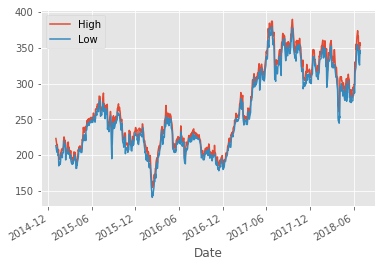

In [7]:
# using matplotlib.pyplot show() method to illustrate the plot above

plt.show()

In [8]:
# reading the saved csv file from hard drive

df = pd.read_csv('tsla.csv')

In [9]:
# reading back a csv file defaults all entries into columns
# so we must make some parameter adjustments when reading the file

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,222.869995,223.250000,213.259995,219.309998,219.309998,4764400
1,2015-01-05,214.550003,216.500000,207.160004,210.089996,210.089996,5368500
2,2015-01-06,210.059998,214.199997,204.210007,211.279999,211.279999,6261900
3,2015-01-07,213.350006,214.779999,209.779999,210.949997,210.949997,2968400
4,2015-01-08,212.809998,213.800003,210.009995,210.619995,210.619995,3442500


In [10]:
# imports the csv file with parsed dates and indexes the date column

df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)

In [11]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,222.869995,223.250000,213.259995,219.309998,219.309998,4764400
2015-01-05,214.550003,216.500000,207.160004,210.089996,210.089996,5368500
2015-01-06,210.059998,214.199997,204.210007,211.279999,211.279999,6261900
2015-01-07,213.350006,214.779999,209.779999,210.949997,210.949997,2968400
2015-01-08,212.809998,213.800003,210.009995,210.619995,210.619995,3442500


In [14]:
# Adj Close gives a better perspective since it's taking into account stock split

df['Adj Close'].plot()

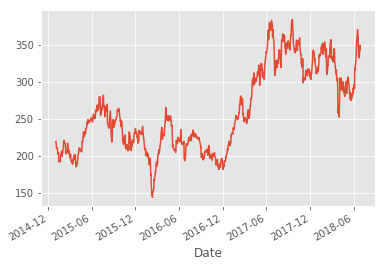

In [15]:
plt.show()

Moving Average is computed by taking a window of time, and calculating the average price in that window. Then we shift that window over one period, and do it again. 

Here I will do a 100-day rolling moving average. So this will take the arbitrarily selected date and its Adj Close price, and the prices from its previous 99 days; add them up, divide by 100, and that equals 100-day moving average of that selected date. Then move the window over 1 day (next date/period). Repeat! 

In [16]:
df['100ma'] = df['Adj Close'].rolling(window=100, ).mean()

In [17]:
# We get NaNs at the top since each date (period) does not have 99-days preceding it

df.head()

,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2015-01-02,222.869995,223.250000,213.259995,219.309998,219.309998,4764400,NaN
2015-01-05,214.550003,216.500000,207.160004,210.089996,210.089996,5368500,NaN
2015-01-06,210.059998,214.199997,204.210007,211.279999,211.279999,6261900,NaN
2015-01-07,213.350006,214.779999,209.779999,210.949997,210.949997,2968400,NaN
2015-01-08,212.809998,213.800003,210.009995,210.619995,210.619995,3442500,NaN


In [18]:
# We don't see an average until the 100th row (5/27/2015)

# NOTE: as we go down the 100ma column, the values don't differ as much as each avg is just moving 1 period (in this case 1-day)
#       essentially, we are just gaining a new data point and losing one data point in the average calculation. 

df.head(110)

,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2015-01-02,222.869995,223.250000,213.259995,219.309998,219.309998,4764400,NaN
2015-01-05,214.550003,216.500000,207.160004,210.089996,210.089996,5368500,NaN
2015-01-06,210.059998,214.199997,204.210007,211.279999,211.279999,6261900,NaN
2015-01-07,213.350006,214.779999,209.779999,210.949997,210.949997,2968400,NaN
2015-01-08,212.809998,213.800003,210.009995,210.619995,210.619995,3442500,NaN
2015-01-09,208.919998,209.979996,204.960007,206.660004,206.660004,4591300,NaN
2015-01-12,203.050003,204.470001,199.250000,202.210007,202.210007,5944200,NaN
2015-01-13,203.320007,207.610001,200.910004,204.250000,204.250000,4477300,NaN
2015-01-14,185.830002,195.199997,185.000000,192.690002,192.690002,11551900,NaN


In [19]:
# we can fix by either dropping the NaNs or in this case, entering 0 min periods

df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0 ).mean()

In [20]:
# What this did is took all the previous periods for each date and then averaged them

#  For the first 100ma entry, it's the same as Adj Close. 
#  For 2nd entry, its current and previous period(s) averaged....and so on
df.head()

,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2015-01-02,222.869995,223.250000,213.259995,219.309998,219.309998,4764400,219.309998
2015-01-05,214.550003,216.500000,207.160004,210.089996,210.089996,5368500,214.699997
2015-01-06,210.059998,214.199997,204.210007,211.279999,211.279999,6261900,213.559998
2015-01-07,213.350006,214.779999,209.779999,210.949997,210.949997,2968400,212.907497
2015-01-08,212.809998,213.800003,210.009995,210.619995,210.619995,3442500,212.449997


In [21]:
# As you can compare the 100th row "100ma" entry and beyond with above tables, you can see that each date henceforth is an average of current and 99 previous periods
# Essentially the 100 days is the max periods to be averaged and 0 is the min!

df.head(110)

,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2015-01-02,222.869995,223.250000,213.259995,219.309998,219.309998,4764400,219.309998
2015-01-05,214.550003,216.500000,207.160004,210.089996,210.089996,5368500,214.699997
2015-01-06,210.059998,214.199997,204.210007,211.279999,211.279999,6261900,213.559998
2015-01-07,213.350006,214.779999,209.779999,210.949997,210.949997,2968400,212.907497
2015-01-08,212.809998,213.800003,210.009995,210.619995,210.619995,3442500,212.449997
2015-01-09,208.919998,209.979996,204.960007,206.660004,206.660004,4591300,211.484998
2015-01-12,203.050003,204.470001,199.250000,202.210007,202.210007,5944200,210.159999
2015-01-13,203.320007,207.610001,200.910004,204.250000,204.250000,4477300,209.421249
2015-01-14,185.830002,195.199997,185.000000,192.690002,192.690002,11551900,207.562222


#### Since the data is daily data, resampling it to 10-day data shrinks the size of dataset significantly. This is how you can condense large datasets. 

In [22]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()

In [23]:
# For a 10-day period, what was "Adj Close" column's opener, highest, lowest, closer

# Example: From 01-02 to 01-09 
# opener = 219.30 , highest = 219.30, lowest = 206.66, closer = 206.66

df_ohlc.head()

,open,high,low,close
Date,,,,
2015-01-02,219.309998,219.309998,206.660004,206.660004
2015-01-12,202.210007,204.250000,191.869995,196.570007
2015-01-22,201.619995,206.550003,199.369995,203.600006
2015-02-01,210.940002,220.990005,210.940002,216.289993
2015-02-11,212.800003,217.110001,202.880005,217.110001


In [24]:
# For a 10-day period, what is the TOTAL volume of stock traded 

df_volume.head()

Date
2015-01-02    27397000
2015-01-12    39435500
2015-01-22    23275700
2015-02-01    27886500
2015-02-11    49434300
Name: Volume, dtype: int64

In [27]:
# we turn the date index into a column
df_ohlc = df_ohlc.reset_index()

In [28]:
# with the matplotlib.dates module, we serialize the dates (number of days since an arbritrary chosen date)

df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

In [29]:
df_ohlc.head()

,Date,open,high,low,close
0,735600.0,219.309998,219.309998,206.660004,206.660004
1,735610.0,202.210007,204.250000,191.869995,196.570007
2,735620.0,201.619995,206.550003,199.369995,203.600006
3,735630.0,210.940002,220.990005,210.940002,216.289993
4,735640.0,212.800003,217.110001,202.880005,217.110001


In [30]:
fig = plt.figure()
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1,sharex=ax1)
ax1.xaxis_date()

In [31]:
candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')

([<matplotlib.lines.Line2D at 0x922ec50>,
  <matplotlib.patches.Rectangle at 0xaa1fbe0>])

In [32]:
# The fill_between function will graph x, y, then what to fill to/between. In our case, we're choosing 0

ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0)

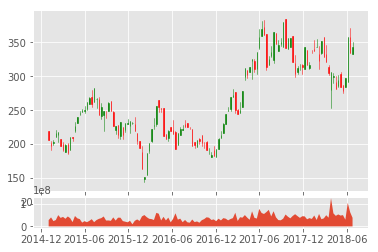

In [33]:
# Time-series stock price data of TSLA and its volume traded (aka candle stick chart)
# Must zoom-in to get a better look. Try magic commands %matplotlib auto to get the chart to populate in a seperate window 


plt.show()

[<a href="#Finance-using-Python-and-Machine-Learning-by-eestra2">Back to top</a>]

## 2. Webscraping and Data API in Bulk

In [7]:
# web scraping library to extract list of s&p 500 list of companies from wiki

import bs4 as bs
import pickle  # serializes python objects in order to be save-enabled files
import requests
import os

import pandas_datareader.data as web
import datetime as dt

In [16]:
# Fetch a website through requests.get()
# Next, use BeautifulSoup() to access the .text attribute to turn the source code to Python object
# Then, use Soup's find() method to extract tickers
# Most financial APIs don't use the "." in the ticker, most use the "-" ; replaced with str.maketrans()
# Finally, Pickled to save the Python list that contains tickers

def save_sp500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text)
    table = soup.find('table', {'class':'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        mapping = str.maketrans(".","-")
        ticker = ticker.translate(mapping)
        tickers.append(ticker)
        
    with open("sp500tickers.pickle","wb") as f:
        pickle.dump(tickers, f)
    
    return tickers

In [17]:
#invoked the function to confirm we have a python object list of tickers

save_sp500_tickers()

C:\Users\eestra2\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\eestra2\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AET',
 'AMG',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'AGN',
 'ADS',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'APC',
 'ADI',
 'ANDV',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ARNC',
 'AJG',
 'AIZ',
 'T',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BHGE',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BBT',
 'BDX',
 'BRK-B',
 'BBY',
 'BIIB',
 'BLK',
 'HRB',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BHF',
 'BMY',
 'AVGO',
 'BR',
 'BF-B',
 'CHRW',
 'CA',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CAT',
 'CBOE',
 'CBRE',
 'CBS',
 'CELG',
 'CNC',
 'CNP',
 'CTL',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'XEC',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS'

In [26]:
# Obtains all the stock data from 1/1/2015 to 12/31/2017 FROM quandl API
# Data is comprised of the s&p 500 companies
# pickled and stored in "stock_dfs" folder directory since it's a massive load of company historical price data


def get_data(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open('sp500tickers.pickle', 'rb') as f:
            tickers = pickle.load(f)
    
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
    
    start = dt.datetime(2015,1,1)
    end = dt.datetime(2017, 12, 31)
    
    #loop through the s&p 500 ticker list to aquire stock data
    for ticker in tickers:
        
        # if-else conditionals to skip data-aquisition step in case it already exists or loop got interrupted
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            
            # try-except is used since errors due to API misreading of ticker or data is not found
            # continue is utilized to reset the loop to prevent an error from stopping the whole loop process
            try:
                df = web.DataReader(ticker, 'quandl', start, end)
                df.to_csv('stock_dfs/{}.csv'.format(ticker))
            except:
                continue
        else:
            print("already have {}".format(ticker))
            

In [27]:
# get_data() invoked; some components of 505 components will not get acquired

get_data()

In [8]:
resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = bs.BeautifulSoup(resp.text)
table = soup.find('table', {'class':'wikitable sortable'})
tickers = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    mapping = str.maketrans(".","-")
    ticker = ticker.translate(mapping)
    tickers.append(ticker)

C:\Users\eestra2\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\eestra2\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [9]:
len(tickers)

505

In [10]:
tickers_omitted = []

for tick in tickers:
    if  not os.path.exists('stock_dfs/{}.csv'.format(tick)):
        tickers_omitted.append(tick)
        

In [11]:
# the tickers that did not go through the pandas_datareader.data.DataReader() for probably the following reasons:
# Most financial data is not freely accessible, the date range entered is out of range for them
# data for them did not exist in quandl for them, string format of ticker does not conform to the API format
# downloading in bulk for some websites' financial API is not permissable 

tickers_omitted

['MMM',
 'AAP',
 'T',
 'BRK-B',
 'BF-B',
 'KMX',
 'CB',
 'C',
 'CME',
 'CTSH',
 'XRAY',
 'DISCA',
 'EVRG',
 'IDXX',
 'JEF',
 'TAP',
 'PBCT',
 'SIVB',
 'SYY',
 'TSCO',
 'UNP',
 'WBA']

In [12]:
print(str(len(tickers_omitted))+" tickers ommited in this file")

22 tickers ommited in this file


In [14]:
with open("sp500tickers_omitted.pickle","wb") as f:
        pickle.dump(tickers_omitted, f)

[<a href="#Finance-using-Python-Quick-Reference-by-eestra2">Back to top</a>]

## 3. Merging Datasets

**Extracting Adjusted Close data column from every particular stock and combining them**

In [13]:
#dependencies
import pandas as pd
import pickle


In [15]:
#loading the picle file that contains ticker full list
with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)

#loading the pickle file that contains the omitted tickers list        
with open("sp500tickers_omitted.pickle","rb") as g:
        omitted_tickers = pickle.load(g)

In [19]:
#But not all tickers were able to get stock information as seen above
# So, we remove those tickers and only keep the successful tickers

for ticker in omitted_tickers:
    tickers.remove(ticker)

with open("sp483tickers.pickle","wb") as h:
        pickle.dump(tickers, h)

In [21]:
# And we confirm that 483 tickers match the number of csv files created
# Or mathematically, 505 total tickers - 22 tickers omitted = 483
len(tickers)

483

In [22]:
# function to combine the stock data into one Pandas DataFrame object
# We're only interested in each day's stock price; therefore, Adjusted Close makes the most sense
# AdjClose > Close ....why? Adjusted as the name implies factors in stock splits

with open("sp483tickers.pickle","rb") as t:
    tickers = pickle.load(t)
     

def merge_data():
    
    #instantiating an empty Dataframe object
    main_df = pd.DataFrame()
    
    # iterating through each ticker to open its corresponding csv file, some data cleaning for relevant facts, and then df join
    for count,ticker in enumerate(tickers):
        df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        
        df.set_index('Date', inplace=True)
        df.rename(columns = {'AdjClose': ticker}, inplace=True)
        df.drop(['Open','High','Low','Close','Volume', 'ExDividend', 'SplitRatio', 'AdjOpen','AdjHigh','AdjLow','AdjVolume'], 1, inplace=True)
        
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how='outer')
    
    if count % 10 == 0:
        print(count)
    
    main_df.to_csv('sp500_companies_AdjClose.csv')

In [23]:
# invoke the merge_data() function

merge_data()

[<a href="#Finance-using-Python-Quick-Reference-by-eestra2">Back to top</a>]

# 4. Correlation Analysis

###  The relationship between the stock price of companies will be assessed through a correlation analysis. Some companies could move together, such as same industry sector. Others could move antagonistically. Stocks have a tendency to become strongly correlated even if they are in different sectors during times of volatility; such as heavy stock market rallies or overall stock market contraction. Correlation changes over time and therefore stocks can be strongly correlated and then later move seperately; vice versa.  An example is, during 2011 various sectors of the S&P 500 had a 95% correlation.  Another example is, during Jan. 2016 S&P 500 and crude oil reached a high of 97% correlation; the highest correlation in 26 years.  Why does this matter? When assets move oppositely to each other, it can serve as an opportunity to invest. If the lagging stock is moving down in price, we can buy up its shares and wait-out until its price starts moving up and then short it for a gain; vice versa when the trend reverses with the other stock.  

In [1]:
#Dependencies
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
style.use('ggplot')

In [2]:
# loading the locally stored sp500_companies_AdjClose.csv file that contains the Ajusted Close prices of almost all 
# s&p 500 companies(483) in a single Pandas Dataframe
df = pd.read_csv('sp500_companies_AdjClose.csv')

# Dataframe.Corr() function gives a dataframe containing the correlation values ranging [-1, 1]
# corr() computes the correlation of column to column or variable to variable 
# Each column, is the stock price over time of a particular company. So it is a variable
# How does a company's stock price move relative to others through time? 
df_corr = df.corr()
print(df_corr.head())

           ABT      ABBV      ABMD       ACN      ATVI      ADBE       AMD  \
ABT   1.000000  0.951949  0.822537  0.969823  0.907946  0.903200 -0.447458   
ABBV  0.951949  1.000000  0.922823  0.911428  0.888955  0.946633  0.680418   
ABMD  0.822537  0.922823  1.000000  0.892700  0.939140  0.954204 -0.113647   
ACN   0.969823  0.911428  0.892700  1.000000  0.942988  0.934540 -0.323501   
ATVI  0.907946  0.888955  0.939140  0.942988  1.000000  0.973781 -0.292980   

           AES       AET       AMG    ...         WYNN       XEL       XRX  \
ABT  -0.175470  0.945973  0.897446    ...     0.773801  0.955763 -0.097069   
ABBV -0.106891  0.927132  0.183667    ...     0.121550  0.813677 -0.261990   
ABMD -0.020454  0.893138  0.573354    ...     0.479800  0.856128 -0.097971   
ACN   0.138647  0.959385  0.832662    ...     0.725173  0.982426 -0.076400   
ATVI -0.177586  0.959124  0.715309    ...     0.591222  0.934237 -0.128506   

          XLNX        XL       XYL       YUM       ZBH      ZI

In [28]:
# Good to save the df table locally as csv file for re-use or future reference
df_corr.to_csv('sp500corr.csv')

In [3]:
# this gives us a numpy array of just the correlation values, row by row
data1 = df_corr.values

In [4]:
data1

array([[ 1.        ,  0.95194895,  0.8225372 , ...,  0.83403674,
        -0.25314569,  0.91010447],
       [ 0.95194895,  1.        ,  0.92282252, ...,  0.72593115,
         0.83595687,  0.93842248],
       [ 0.8225372 ,  0.92282252,  1.        , ...,  0.73793635,
        -0.00189725,  0.96498697],
       ..., 
       [ 0.83403674,  0.72593115,  0.73793635, ...,  1.        ,
         0.09942176,  0.75654648],
       [-0.25314569,  0.83595687, -0.00189725, ...,  0.09942176,
         1.        ,  0.83494267],
       [ 0.91010447,  0.93842248,  0.96498697, ...,  0.75654648,
         0.83494267,  1.        ]])

In [5]:
# set-up for graphing using the matplotlib.pyplot library

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

In [6]:
# heatmaps are a type of graph that color codes information such as a scale
# color options can be found at the maplotlib library website https://matplotlib.org/users/colormaps.html
# Classes of colormaps come in 3 categories: Sequential, diverging, qualitative. 
# Since correlation values range -1 to 1, so only deviating around zero, diverge colormap suits it
# I chose RdYlBu; Red for negative correlations, Yellow for no correlation, blue for positive, opacity determines the strength of the correlation

heatmap1 = ax1.pcolor(data1, cmap=plt.cm.RdYlBu)

In [7]:
# side-colorbar
fig1.colorbar(heatmap1)

In [8]:
# x and y axis tick bars
ax1.set_xticks(np.arange(data1.shape[1]) + 0.5, minor=False)
ax1.set_yticks(np.arange(data1.shape[0]) + 0.5, minor=False)

In [9]:
#More graph ticks

ax1.invert_yaxis()
ax1.xaxis.tick_top()

In [10]:
#actual company names
column_labels = df_corr.columns
row_labels = df_corr.index
ax1.set_xticklabels(column_labels)
ax1.set_yticklabels(row_labels)

[Text(0,0,'ABT'),
 Text(0,0,'ABBV'),
 Text(0,0,'ABMD'),
 Text(0,0,'ACN'),
 Text(0,0,'ATVI'),
 Text(0,0,'ADBE'),
 Text(0,0,'AMD'),
 Text(0,0,'AES'),
 Text(0,0,'AET'),
 Text(0,0,'AMG'),
 Text(0,0,'AFL'),
 Text(0,0,'A'),
 Text(0,0,'APD'),
 Text(0,0,'AKAM'),
 Text(0,0,'ALK'),
 Text(0,0,'ALB'),
 Text(0,0,'ARE'),
 Text(0,0,'ALXN'),
 Text(0,0,'ALGN'),
 Text(0,0,'ALLE'),
 Text(0,0,'AGN'),
 Text(0,0,'ADS'),
 Text(0,0,'LNT'),
 Text(0,0,'ALL'),
 Text(0,0,'GOOGL'),
 Text(0,0,'GOOG'),
 Text(0,0,'MO'),
 Text(0,0,'AMZN'),
 Text(0,0,'AEE'),
 Text(0,0,'AAL'),
 Text(0,0,'AEP'),
 Text(0,0,'AXP'),
 Text(0,0,'AIG'),
 Text(0,0,'AMT'),
 Text(0,0,'AWK'),
 Text(0,0,'AMP'),
 Text(0,0,'ABC'),
 Text(0,0,'AME'),
 Text(0,0,'AMGN'),
 Text(0,0,'APH'),
 Text(0,0,'APC'),
 Text(0,0,'ADI'),
 Text(0,0,'ANDV'),
 Text(0,0,'ANSS'),
 Text(0,0,'ANTM'),
 Text(0,0,'AON'),
 Text(0,0,'AOS'),
 Text(0,0,'APA'),
 Text(0,0,'AIV'),
 Text(0,0,'AAPL'),
 Text(0,0,'AMAT'),
 Text(0,0,'APTV'),
 Text(0,0,'ADM'),
 Text(0,0,'ARNC'),
 Text(0,0,'

In [11]:
# final adjustments and setting the number range
plt.xticks(rotation=90)
heatmap1.set_clim(-1,1)
plt.tight_layout()


In [ ]:
# Good to always save locally large data computational-lengthy objects for reuse or future reference
#plt.savefig("sp500_CorrGraph.png", dpi = (300))

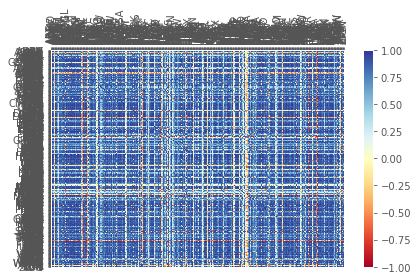

In [12]:
# commands python to display the graph
plt.show()

## Correlation Graph Conclusion
### The graph is very hard to render as it is massive in size (500x500). Luckily, the heat map comes in handy as we don't have  to see the actual values. The color gradient scale allows us to easily infer that since it is mostly blue, s&p 500 stocks are therefore mostly postively related with different correlation strengths. It comes to no surprise as it is historically known that U.S. equity markets typically move in the same direction altogether as a whole.  According to the correlation graph, there are some companies with inverse correlations possibly due to the industry in which the company belongs to. A few sectors or industry areas can be typically deemed "recession proof"  by investors. So when the economy is not doing so well, there are investors that instead of diverting to other asset classes, they short their current volatile assets and invest in more stable stocks that don't closely move with the whole economy.  For instance, Allegion plc (ALLE) and Apache Corporation (APA) are very negatively correlated. Generally, when there's an economic expansion energy/oil-gas demand increases, so APA profits increase and so do their stock value. When the economy retracts, energy/oil demand decrease so there is less business for them. For Allegion who is in the security & protection services, one might postulate that during bad economic times, the crime rate goes up and so do demand for security business services. During good economic times, crime rate generally goes down and so does the need for security to counter it. It could also be simply that some stocks just fall out of favor during certain times of large market rallies. Think of market bubbles of the dot com crash where prior to that, everyone was rushing to tech and dot com businesses while others were shunned. 

#### Possible expansion on this: 
#### Integrate the tickers with its corresponding sector and industry in order to create subsets of tickers that are grouped accroding to their sector or industry. 

In [1]:
#Using the Pandas read_html() method to webscrape html files as opposed to the usage of beautiful soup and request modules 

import pandas as pd
wiki = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

In [2]:
# Shows a GIANT list of lists
wiki

[                 0                                    1            2  \
 0    Ticker symbol                             Security  SEC filings   
 1              MMM                           3M Company      reports   
 2              ABT                  Abbott Laboratories      reports   
 3             ABBV                          AbbVie Inc.      reports   
 4             ABMD                          ABIOMED Inc      reports   
 5              ACN                        Accenture plc      reports   
 6             ATVI                  Activision Blizzard      reports   
 7             ADBE                    Adobe Systems Inc      reports   
 8              AMD           Advanced Micro Devices Inc      reports   
 9              AAP                   Advance Auto Parts      reports   
 10             AES                             AES Corp      reports   
 11             AET                            Aetna Inc      reports   
 12             AMG        Affiliated Managers Grou

In [6]:
type(wiki)

list

In [7]:
# We're interested in the first table of the website, so that is located in the first list

wiki[0]

,0,1,2,3,4,5,6,7,8
0,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Location,Date first added[3][4],CIK,Founded
1,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,0000066740,1902
2,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,0000001800,1888
3,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,0001551152,2013 (1888)
4,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,0000815094,1981
5,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,0001467373,1989
6,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,0000718877,2008
7,ADBE,Adobe Systems Inc,reports,Information Technology,Application Software,"San Jose, California",1997-05-05,0000796343,1982
8,AMD,Advanced Micro Devices Inc,reports,Information Technology,Semiconductors,"Sunnyvale, California",2017-03-20,0000002488,1969
9,AAP,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Roanoke, Virginia",2015-07-09,0001158449,1932


Next, extrating columns rests upon one's discretion.
I personally am interested in obtaining tickers, sector and sub industry in order to analyze stocks by groups in order answer the folowing questions:
How volatile are stocks in some industries versus others during market cycles?
Do some industries/sectors have postive or negative correlations?
If yes, what is the correlation strength (magnitude), is it a huge difference?

In [9]:
wiki[0][0]

0      Ticker symbol
1                MMM
2                ABT
3               ABBV
4               ABMD
5                ACN
6               ATVI
7               ADBE
8                AMD
9                AAP
10               AES
11               AET
12               AMG
13               AFL
14                 A
15               APD
16              AKAM
17               ALK
18               ALB
19               ARE
20              ALXN
21              ALGN
22              ALLE
23               AGN
24               ADS
25               LNT
26               ALL
27             GOOGL
28              GOOG
29                MO
           ...      
476             VRTX
477             VIAB
478                V
479              VNO
480              VMC
481              WMT
482              WBA
483              DIS
484               WM
485              WAT
486              WEC
487              WFC
488             WELL
489              WDC
490               WU
491              WRK
492          

In [10]:
wiki[0][1]

0                                 Security
1                               3M Company
2                      Abbott Laboratories
3                              AbbVie Inc.
4                              ABIOMED Inc
5                            Accenture plc
6                      Activision Blizzard
7                        Adobe Systems Inc
8               Advanced Micro Devices Inc
9                       Advance Auto Parts
10                                AES Corp
11                               Aetna Inc
12           Affiliated Managers Group Inc
13                               AFLAC Inc
14                Agilent Technologies Inc
15            Air Products & Chemicals Inc
16                 Akamai Technologies Inc
17                    Alaska Air Group Inc
18                          Albemarle Corp
19     Alexandria Real Estate Equities Inc
20                 Alexion Pharmaceuticals
21                        Align Technology
22                                Allegion
23         

In [12]:
wiki[0][3]

0                 GICS Sector
1                 Industrials
2                 Health Care
3                 Health Care
4                 Health Care
5      Information Technology
6      Information Technology
7      Information Technology
8      Information Technology
9      Consumer Discretionary
10                  Utilities
11                Health Care
12                 Financials
13                 Financials
14                Health Care
15                  Materials
16     Information Technology
17                Industrials
18                  Materials
19                Real Estate
20                Health Care
21                Health Care
22                Industrials
23                Health Care
24     Information Technology
25                  Utilities
26                 Financials
27     Information Technology
28     Information Technology
29           Consumer Staples
                ...          
476               Health Care
477    Consumer Discretionary
478    Inf

In [13]:
wiki[0][4]

0                                 GICS Sub Industry
1                          Industrial Conglomerates
2                             Health Care Equipment
3                                   Pharmaceuticals
4                             Health Care Equipment
5                    IT Consulting & Other Services
6                       Home Entertainment Software
7                              Application Software
8                                    Semiconductors
9                                 Automotive Retail
10     Independent Power Producers & Energy Traders
11                              Managed Health Care
12                 Asset Management & Custody Banks
13                          Life & Health Insurance
14                            Health Care Equipment
15                                 Industrial Gases
16                     Internet Software & Services
17                                         Airlines
18                              Specialty Chemicals
19          

[<a href="#Finance-using-Python-Quick-Reference-by-eestra2">Back to top</a>]

# 5. Prep Data for Machine Learning

In the steps above, we have so far personally scoured through the data and applied our own intuition to try and detect patterns/trends. However, what if I told you (insert a morpheus of the film Matrix meme here) a machine can do this for you and do a better job as it can take more data at a time than a human can. In this step, we start preparing the data through some data manipulation so that we can feed it into the machine learning algorithm that will attempt to learn the mapping between the features and labels (a.k.a. inputs and outputs, independent variables and dependent variable).  

In [1]:
import pandas as pd
import numpy as np


In [2]:
#Counter gives the distribution of classes in the dataset and in Machine Learning Algorithm's predictions
# Basically its a counter of how many of each classes there are; hence, the word "Counter"
# Remember the classes are buy, sell and hold; as shown above in above cell

from collections import Counter

Below are dissected parts of the extract_featuresets() function above

## **WARNING: DO NOT RUN CELLS BELOW**

**DEMONSTRATION ONLY**

In [3]:
# We read the  locally stored csv file with Pandas and also extract the column names into a python list object

df = pd.read_csv('sp500_companies_AdjClose.csv', index_col=0)
tickers = df.columns.values.tolist()

In [6]:
# There are a lot of missing fields in the dataframe due to the fact that some companies are newcomers to the s&p500 index
# In other words, they did not exist back in the beginning of the 2000s (Ex. ABBV was founded in 2013)
df.head(50)

,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AES,AET,AMG,...,WYNN,XEL,XRX,XLNX,XL,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,10.071733,NaN,18.250,NaN,1.252334,16.277607,15.500,27.856077,6.159197,24.441299,...,NaN,8.469647,74.282588,34.902729,32.047813,NaN,4.917095,NaN,43.826745,NaN
2000-01-04,9.783969,NaN,17.815,NaN,1.214246,14.912036,14.625,26.753361,6.054992,22.485995,...,NaN,8.665786,70.812587,34.111352,30.600734,NaN,4.818253,NaN,41.702530,NaN
2000-01-05,9.729294,NaN,18.065,NaN,1.218816,15.177701,14.655,26.918576,6.013975,21.907385,...,NaN,8.888671,71.211791,33.409564,30.644395,NaN,4.851200,NaN,41.899948,NaN
2000-01-06,10.109142,NaN,18.030,NaN,1.195202,15.331638,16.000,27.256691,6.020626,22.612359,...,NaN,8.915418,72.931437,30.468030,31.112201,NaN,4.802438,NaN,42.247403,NaN
2000-01-07,10.215615,NaN,17.940,NaN,1.227958,16.076495,16.250,27.783075,6.416384,23.151065,...,NaN,8.915418,74.651084,33.924706,33.176784,NaN,4.695688,NaN,42.350060,NaN
2000-01-10,10.143674,NaN,20.500,NaN,1.290422,16.697209,17.500,29.031796,6.297768,23.736326,...,NaN,8.915418,72.931437,35.649312,33.682014,NaN,4.884148,NaN,41.584079,NaN
2000-01-11,9.999792,NaN,19.815,NaN,1.347554,15.550130,17.030,29.177800,6.305528,23.649867,...,NaN,8.915418,72.163738,32.804833,33.139359,NaN,4.851200,NaN,39.388794,NaN
2000-01-12,9.850155,NaN,19.595,NaN,1.290422,15.470678,18.125,29.777186,6.284465,23.696422,...,NaN,9.111557,71.979490,32.804833,32.085237,NaN,4.802438,NaN,39.728352,NaN
2000-01-13,9.760502,NaN,21.000,NaN,1.304134,16.294987,18.875,30.280516,6.353196,24.900197,...,NaN,9.084811,73.883384,33.782856,32.047813,NaN,4.876240,NaN,43.187112,NaN


In [4]:
# we fill-in those NaNs with zeros 
# In an alternate version of this, we could possibly get data for thos companies 
df.fillna(0, inplace=True)

In [8]:
#much better!
df.head()

,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AES,AET,AMG,...,WYNN,XEL,XRX,XLNX,XL,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,10.071733,0.0,18.250,0.0,1.252334,16.277607,15.500,27.856077,6.159197,24.441299,...,0.0,8.469647,74.282588,34.902729,32.047813,0.0,4.917095,0.0,43.826745,0.0
2000-01-04,9.783969,0.0,17.815,0.0,1.214246,14.912036,14.625,26.753361,6.054992,22.485995,...,0.0,8.665786,70.812587,34.111352,30.600734,0.0,4.818253,0.0,41.702530,0.0
2000-01-05,9.729294,0.0,18.065,0.0,1.218816,15.177701,14.655,26.918576,6.013975,21.907385,...,0.0,8.888671,71.211791,33.409564,30.644395,0.0,4.851200,0.0,41.899948,0.0
2000-01-06,10.109142,0.0,18.030,0.0,1.195202,15.331638,16.000,27.256691,6.020626,22.612359,...,0.0,8.915418,72.931437,30.468030,31.112201,0.0,4.802438,0.0,42.247403,0.0
2000-01-07,10.215615,0.0,17.940,0.0,1.227958,16.076495,16.250,27.783075,6.416384,23.151065,...,0.0,8.915418,74.651084,33.924706,33.176784,0.0,4.695688,0.0,42.350060,0.0


Next, we arbritrarily choose "number of days into the future" that we want to predict prices for. My personal choice is a week (7-days). I believe 7-days is a conservative move as we can't trust a model to predict to far out into the future. Lots of things can happen in a week in the world of the stock market! 

In [6]:
# Using Pandas.DataFrame.shift() method, we will be shifting the columns (prices) up. 
# This is a sample of what is going to be done iteratively
# As you can see, 01/03/2000 now has the price of its succeeding day 01/04/2000, and so does the rest except for the last value
df['ABT'].shift(-7)

Date
2000-01-03     9.783969
2000-01-04     9.729294
2000-01-05    10.109142
2000-01-06    10.215615
2000-01-07    10.143674
2000-01-10     9.999792
2000-01-11     9.850155
2000-01-12     9.760502
2000-01-13     9.977403
2000-01-14     9.760502
2000-01-18     9.560954
2000-01-19     9.268862
2000-01-20     9.020150
2000-01-21     8.676002
2000-01-24     8.568998
2000-01-25     8.586350
2000-01-26     8.910254
2000-01-27     9.219698
2000-01-28     9.416354
2000-01-31     9.508898
2000-02-01     9.560954
2000-02-02     9.615902
2000-02-03     9.960051
2000-02-04     9.777855
2000-02-07     9.870399
2000-02-08    10.428555
2000-02-09    10.159599
2000-02-10     9.832803
2000-02-11    10.139355
2000-02-14    10.159599
                ...    
2018-02-13    58.280000
2018-02-14    59.500000
2018-02-15    60.170000
2018-02-16    59.120000
2018-02-20    58.990000
2018-02-21    58.990000
2018-02-22    59.710000
2018-02-23    60.530000
2018-02-26    60.550000
2018-02-27    60.330000
2018-02-28 

In [5]:
# Here we are going to shift up to 7 days, one day at a time to get a difference and getting its % change
# (Final-initial)/initial, then adding the new values to the dataframe as a new column for each iteration (# of days shifted)


def process_data_for_labels(ticker):
    
    # number of days to forecast out to. Can be changed at one's discretion
    dd_forecast = 7
    
    for i in range(1,dd_forecast+1):
        df['{}_{}d'.format(ticker,i)] = (df[ticker].shift(-i) - df[ticker]) / df[ticker]
        
    return df

In [10]:
# Let's test the %price change for ABT
process_data_for_labels('ABT')

#Voila! We have 7 additional columns with the %price changes, each column being the number of days shifted
# You can also tell not only by the header of the column, but also by the number of NaNs in each column corresponding to the number of days


,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AES,AET,AMG,...,ZBH,ZION,ZTS,ABT_1d,ABT_2d,ABT_3d,ABT_4d,ABT_5d,ABT_6d,ABT_7d
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,10.071733,0.00,18.250,0.00,1.252334,16.277607,15.500,27.856077,6.159197,24.441299,...,0.00,43.826745,0.00,-0.028571,-0.034000,0.003714,0.014286,0.007143,-0.007143,-0.022000
2000-01-04,9.783969,0.00,17.815,0.00,1.214246,14.912036,14.625,26.753361,6.054992,22.485995,...,0.00,41.702530,0.00,-0.005588,0.033235,0.044118,0.036765,0.022059,0.006765,-0.002398
2000-01-05,9.729294,0.00,18.065,0.00,1.218816,15.177701,14.655,26.918576,6.013975,21.907385,...,0.00,41.899948,0.00,0.039042,0.049985,0.042591,0.027802,0.012422,0.003208,0.025501
2000-01-06,10.109142,0.00,18.030,0.00,1.195202,15.331638,16.000,27.256691,6.020626,22.612359,...,0.00,42.247403,0.00,0.010532,0.003416,-0.010817,-0.025619,-0.034488,-0.013032,-0.034488
2000-01-07,10.215615,0.00,17.940,0.00,1.227958,16.076495,16.250,27.783075,6.416384,23.151065,...,0.00,42.350060,0.00,-0.007042,-0.021127,-0.035775,-0.044551,-0.023318,-0.044551,-0.064084
2000-01-10,10.143674,0.00,20.500,0.00,1.290422,16.697209,17.500,29.031796,6.297768,23.736326,...,0.00,41.584079,0.00,-0.014184,-0.028936,-0.037774,-0.016392,-0.037774,-0.057447,-0.086242
2000-01-11,9.999792,0.00,19.815,0.00,1.347554,15.550130,17.030,29.177800,6.305528,23.649867,...,0.00,39.388794,0.00,-0.014964,-0.023929,-0.002239,-0.023929,-0.043885,-0.073094,-0.097966
2000-01-12,9.850155,0.00,19.595,0.00,1.290422,15.470678,18.125,29.777186,6.284465,23.696422,...,0.00,39.728352,0.00,-0.009102,0.012918,-0.009102,-0.029360,-0.059014,-0.084263,-0.119201
2000-01-13,9.760502,0.00,21.000,0.00,1.304134,16.294987,18.875,30.280516,6.353196,24.900197,...,0.00,43.187112,0.00,0.022222,0.000000,-0.020444,-0.050370,-0.075852,-0.111111,-0.122074


In [6]:
# Lastly we just want to get rid of those NaN values and replace them with 0s 

process_data_for_labels('ABT').fillna(0)

# We could even test a sample of it. Looking at ABT_1d first first row, we get that by subtracting the  original value to the shifted value and diving by the original value of that particular date
# Since it's 1 day, we do 9.783969-10.071733 / 10.071733 = -0.028571 .... so we have a match!
# Another sample test....  let's do ABT_2d first row, 9.729294-10.071733 / 10.071733 = -0.028571

,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AES,AET,AMG,...,ZBH,ZION,ZTS,ABT_1d,ABT_2d,ABT_3d,ABT_4d,ABT_5d,ABT_6d,ABT_7d
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,10.071733,0.00,18.250,0.00,1.252334,16.277607,15.500,27.856077,6.159197,24.441299,...,0.00,43.826745,0.00,-0.028571,-0.034000,0.003714,0.014286,0.007143,-0.007143,-0.022000
2000-01-04,9.783969,0.00,17.815,0.00,1.214246,14.912036,14.625,26.753361,6.054992,22.485995,...,0.00,41.702530,0.00,-0.005588,0.033235,0.044118,0.036765,0.022059,0.006765,-0.002398
2000-01-05,9.729294,0.00,18.065,0.00,1.218816,15.177701,14.655,26.918576,6.013975,21.907385,...,0.00,41.899948,0.00,0.039042,0.049985,0.042591,0.027802,0.012422,0.003208,0.025501
2000-01-06,10.109142,0.00,18.030,0.00,1.195202,15.331638,16.000,27.256691,6.020626,22.612359,...,0.00,42.247403,0.00,0.010532,0.003416,-0.010817,-0.025619,-0.034488,-0.013032,-0.034488
2000-01-07,10.215615,0.00,17.940,0.00,1.227958,16.076495,16.250,27.783075,6.416384,23.151065,...,0.00,42.350060,0.00,-0.007042,-0.021127,-0.035775,-0.044551,-0.023318,-0.044551,-0.064084
2000-01-10,10.143674,0.00,20.500,0.00,1.290422,16.697209,17.500,29.031796,6.297768,23.736326,...,0.00,41.584079,0.00,-0.014184,-0.028936,-0.037774,-0.016392,-0.037774,-0.057447,-0.086242
2000-01-11,9.999792,0.00,19.815,0.00,1.347554,15.550130,17.030,29.177800,6.305528,23.649867,...,0.00,39.388794,0.00,-0.014964,-0.023929,-0.002239,-0.023929,-0.043885,-0.073094,-0.097966
2000-01-12,9.850155,0.00,19.595,0.00,1.290422,15.470678,18.125,29.777186,6.284465,23.696422,...,0.00,39.728352,0.00,-0.009102,0.012918,-0.009102,-0.029360,-0.059014,-0.084263,-0.119201
2000-01-13,9.760502,0.00,21.000,0.00,1.304134,16.294987,18.875,30.280516,6.353196,24.900197,...,0.00,43.187112,0.00,0.022222,0.000000,-0.020444,-0.050370,-0.075852,-0.111111,-0.122074


In [6]:
# Function that will dictate whether to buy (1), sell (-1), and (0) for hold
# This depends on your personal threshold; I personally like 5% as anything less I think it is simply just regualr market movement

# The args parameter will take on n-number of columns' iterations SIMULTANEOUSLY, the 'TICKER_dd' columns
# Basically a GIANT list of lists ( which is essentially a list containing lists of each row values)
# so it is prudent to use *args, a special Python function parameter

def invest_indicator(*args):
    
    # cols is a GIANT list containing lists of columns of each row
    cols = [c for c in args]
    threshold = 0.05
    for col in cols:
        if col > threshold:
            return 1
        if col < -threshold:
            return -1
    return 0

In [10]:
# This is the major component of the components

def extract_featuresets(ticker):
    
    # Applying the invest_indicator() function to every ROW in the "TICKER_dd" columns using map()
    # map(f, iterable) is equivalent to.....  for x in iterable: f(x)
    # NOTE: that since it's mapping more than one iterable object(column), map will apply the function to ONE element each column
    #       before returning back to the first iterable object(column); as opposed to doing all of the column at a time. 
    
    # Looks something like this "under the hood":
    #    for x in iterable1,interable2,...iterable7: f(x) 
    #    map() DOES NOT return the results, so its common to nest the result in a list() or set()
    #    so the invest_indicator() function appends the first round of interables into a list
    #    with the cols = [c for c in args]
    #    cols = [R1C1, R1C2, R1C3.....R1C7]
    #    Then for-loop in the investment indicator interates to find first element that satisfies the comparisons that classify
    #    invest_indicator returns a 1, or -1 if ANY of the 7 inputs exceeds requirement, not a value for each input. 
    #    So it returns one output for n inputs
    #    list(0, 0, 0.....)
    
    # SEE SIMPLIFIED ANALAGOUS EXAMPLE BELOW FOR FURTHER ENLIGHTMENT 
    
    # adding a new column to the dataframe(df) which holds the target values
    df['{}_target'.format(ticker)] = list(map( invest_indicator,
                                               df['{}_1d'.format(ticker)],
                                               df['{}_2d'.format(ticker)],
                                               df['{}_3d'.format(ticker)],
                                               df['{}_4d'.format(ticker)],
                                               df['{}_5d'.format(ticker)],
                                               df['{}_6d'.format(ticker)],
                                               df['{}_7d'.format(ticker)] ))
    
    # Counting target value distribution
    vals = df['{}_target'.format(ticker)].values.tolist()
    str_vals = [str(i) for i in vals]
    print('Data spread:',Counter(str_vals))
    
    #here we sub the NaNs with 0s
    #Then we replace infinite values (if there are any) with NaNs
    # and then drop them
    df.fillna(0, inplace=True)
    df = df.replace([np.inf, -np.inf], np.nan)
    df.dropna(inplace=True)
    
    # Convert the regular tickers columns into a %change  and then apply some after-cleanup
    df_vals = df[[ticker for ticker in tickers]].pct_change()
    df_vals = df_vals.replace([np.inf, -np.inf], 0)
    df_vals.fillna(0, inplace=True)
    
    # Reference the pct_changed values to X, the target column referenced to y, and the newly processed dataframe df
    X = df_vals.values
    y = df['{}_target'.format(ticker)].values

    return X,y, df

In [40]:
# def function_multiparas(*args):
#     cols = [c for c in args]
#     return cols
#
# lst = [1,2,3,4]
# lst2 = [11,12,13,14]
# lst3 = [21,22,23,24]
#
# result =[map(function_multiparas, lst,lst2,lst3)]

In [41]:
# result

[[1, 11, 21], [2, 12, 22], [3, 13, 23], [4, 14, 24]]

In [49]:
# Now I add the comparison criteria to the function to show how each set of inputs(lists) returns one output for each

#def function_multiparas(*args):
#    cols = [c for c in args]
#    threshold = 3
#    for col in cols:
#        if col > threshold:
#            return 1
#        if col < threshold:
#            return -1
#    return 0
#
#lst = [1,2,3,4]
#lst2 = [11,12,13,14]
#lst3 = [21,22,23,24]
#
#result =list(map(function_multiparas, lst,lst2,lst3))

In [50]:
# For the 4 set of lists above, I get one output for each

#result

[-1, -1, 1, 1]

In [24]:
# A demonstration of extract_featuresets() in its preliminary state

def extract_featuresets(ticker):
    df['{}_target'.format(ticker)] = list(map( invest_indicator,
                                               df['{}_1d'.format(ticker)],
                                               df['{}_2d'.format(ticker)],
                                               df['{}_3d'.format(ticker)],
                                               df['{}_4d'.format(ticker)],
                                               df['{}_5d'.format(ticker)],
                                               df['{}_6d'.format(ticker)],
                                               df['{}_7d'.format(ticker)] ))
    return df                                            
    
aaa = extract_featuresets('ABT')

In [25]:
# aaa

,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AES,AET,AMG,...,ZION,ZTS,ABT_1d,ABT_2d,ABT_3d,ABT_4d,ABT_5d,ABT_6d,ABT_7d,ABT_target
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,10.071733,0.00,18.250,0.00,1.252334,16.277607,15.500,27.856077,6.159197,24.441299,...,43.826745,0.00,-0.028571,-0.034000,0.003714,0.014286,0.007143,-0.007143,-0.022000,0
2000-01-04,9.783969,0.00,17.815,0.00,1.214246,14.912036,14.625,26.753361,6.054992,22.485995,...,41.702530,0.00,-0.005588,0.033235,0.044118,0.036765,0.022059,0.006765,-0.002398,0
2000-01-05,9.729294,0.00,18.065,0.00,1.218816,15.177701,14.655,26.918576,6.013975,21.907385,...,41.899948,0.00,0.039042,0.049985,0.042591,0.027802,0.012422,0.003208,0.025501,0
2000-01-06,10.109142,0.00,18.030,0.00,1.195202,15.331638,16.000,27.256691,6.020626,22.612359,...,42.247403,0.00,0.010532,0.003416,-0.010817,-0.025619,-0.034488,-0.013032,-0.034488,0
2000-01-07,10.215615,0.00,17.940,0.00,1.227958,16.076495,16.250,27.783075,6.416384,23.151065,...,42.350060,0.00,-0.007042,-0.021127,-0.035775,-0.044551,-0.023318,-0.044551,-0.064084,-1
2000-01-10,10.143674,0.00,20.500,0.00,1.290422,16.697209,17.500,29.031796,6.297768,23.736326,...,41.584079,0.00,-0.014184,-0.028936,-0.037774,-0.016392,-0.037774,-0.057447,-0.086242,-1
2000-01-11,9.999792,0.00,19.815,0.00,1.347554,15.550130,17.030,29.177800,6.305528,23.649867,...,39.388794,0.00,-0.014964,-0.023929,-0.002239,-0.023929,-0.043885,-0.073094,-0.097966,-1
2000-01-12,9.850155,0.00,19.595,0.00,1.290422,15.470678,18.125,29.777186,6.284465,23.696422,...,39.728352,0.00,-0.009102,0.012918,-0.009102,-0.029360,-0.059014,-0.084263,-0.119201,-1
2000-01-13,9.760502,0.00,21.000,0.00,1.304134,16.294987,18.875,30.280516,6.353196,24.900197,...,43.187112,0.00,0.022222,0.000000,-0.020444,-0.050370,-0.075852,-0.111111,-0.122074,-1


In [54]:
# Second Demonstration to show the distribution of the target values (0,1,2)

def extract_featuresets(ticker):
    df['{}_target'.format(ticker)] = list(map( invest_indicator,
                                               df['{}_1d'.format(ticker)],
                                               df['{}_2d'.format(ticker)],
                                               df['{}_3d'.format(ticker)],
                                               df['{}_4d'.format(ticker)],
                                               df['{}_5d'.format(ticker)],
                                               df['{}_6d'.format(ticker)],
                                               df['{}_7d'.format(ticker)] ))
    
    #extracts the values of the target column and places it into a list
    vals = df['{}_target'.format(ticker)].values.tolist()
    
    #converts the numeric values in the list into strings as Counter() function only counts string type objects
    str_vals = [str(i) for i in vals]
    
    print('Data spread:',Counter(str_vals))

    return df                                            
    
bbb = extract_featuresets('ABT')
bbb

Data spread: Counter({'0': 3668, '1': 503, '-1': 416})


,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AES,AET,AMG,...,ZION,ZTS,ABT_1d,ABT_2d,ABT_3d,ABT_4d,ABT_5d,ABT_6d,ABT_7d,ABT_target
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,10.071733,0.00,18.250,0.00,1.252334,16.277607,15.500,27.856077,6.159197,24.441299,...,43.826745,0.00,-0.028571,-0.034000,0.003714,0.014286,0.007143,-0.007143,-0.022000,0
2000-01-04,9.783969,0.00,17.815,0.00,1.214246,14.912036,14.625,26.753361,6.054992,22.485995,...,41.702530,0.00,-0.005588,0.033235,0.044118,0.036765,0.022059,0.006765,-0.002398,0
2000-01-05,9.729294,0.00,18.065,0.00,1.218816,15.177701,14.655,26.918576,6.013975,21.907385,...,41.899948,0.00,0.039042,0.049985,0.042591,0.027802,0.012422,0.003208,0.025501,0
2000-01-06,10.109142,0.00,18.030,0.00,1.195202,15.331638,16.000,27.256691,6.020626,22.612359,...,42.247403,0.00,0.010532,0.003416,-0.010817,-0.025619,-0.034488,-0.013032,-0.034488,0
2000-01-07,10.215615,0.00,17.940,0.00,1.227958,16.076495,16.250,27.783075,6.416384,23.151065,...,42.350060,0.00,-0.007042,-0.021127,-0.035775,-0.044551,-0.023318,-0.044551,-0.064084,-1
2000-01-10,10.143674,0.00,20.500,0.00,1.290422,16.697209,17.500,29.031796,6.297768,23.736326,...,41.584079,0.00,-0.014184,-0.028936,-0.037774,-0.016392,-0.037774,-0.057447,-0.086242,-1
2000-01-11,9.999792,0.00,19.815,0.00,1.347554,15.550130,17.030,29.177800,6.305528,23.649867,...,39.388794,0.00,-0.014964,-0.023929,-0.002239,-0.023929,-0.043885,-0.073094,-0.097966,-1
2000-01-12,9.850155,0.00,19.595,0.00,1.290422,15.470678,18.125,29.777186,6.284465,23.696422,...,39.728352,0.00,-0.009102,0.012918,-0.009102,-0.029360,-0.059014,-0.084263,-0.119201,-1
2000-01-13,9.760502,0.00,21.000,0.00,1.304134,16.294987,18.875,30.280516,6.353196,24.900197,...,43.187112,0.00,0.022222,0.000000,-0.020444,-0.050370,-0.075852,-0.111111,-0.122074,-1


In [2]:
# Third Demonstration portraying extract_features() last block of code that converts the daily prices of the tickers
# to percent changes using the pct_change() function. 
# the default period is 1: pd.Series.pct_change(periods=1)


#  def extract_featuresets(ticker):

        .......    
    
       df_vals = df[[ticker for ticker in tickers]].pct_change()
       df_vals = df_vals.replace([np.inf, -np.inf], 0)
       df_vals.fillna(0, inplace=True)
        
       return df_vals

extract_featuresets('ABT')

Data spread: Counter({'0': 3668, '1': 503, '-1': 416})


,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AES,AET,AMG,...,WYNN,XEL,XRX,XLNX,XL,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2000-01-04,-0.028571,0.000000,-0.023836,0.000000,-0.030414,-0.083893,-0.056452,-0.039586,-0.016919,-0.080000,...,0.000000,0.023158,-0.046714,-0.022674,-0.045154,0.000000,-0.020102,0.000000,-0.048468,0.000000
2000-01-05,-0.005588,0.000000,0.014033,0.000000,0.003764,0.017816,0.002051,0.006175,-0.006774,-0.025732,...,0.000000,0.025720,0.005637,-0.020573,0.001427,0.000000,0.006838,0.000000,0.004734,0.000000
2000-01-06,0.039042,0.000000,-0.001937,0.000000,-0.019375,0.010142,0.091778,0.012561,0.001106,0.032180,...,0.000000,0.003009,0.024148,-0.088045,0.015266,0.000000,-0.010052,0.000000,0.008292,0.000000
2000-01-07,0.010532,0.000000,-0.004992,0.000000,0.027406,0.048583,0.015625,0.019312,0.065734,0.023824,...,0.000000,0.000000,0.023579,0.113453,0.066359,0.000000,-0.022228,0.000000,0.002430,0.000000
2000-01-10,-0.007042,0.000000,0.142698,0.000000,0.050868,0.038610,0.076923,0.044945,-0.018487,0.025280,...,0.000000,0.000000,-0.023036,0.050836,0.015228,0.000000,0.040135,0.000000,-0.018087,0.000000
2000-01-11,-0.014184,0.000000,-0.033415,0.000000,0.044274,-0.068699,-0.026857,0.005029,0.001232,-0.003642,...,0.000000,0.000000,-0.010526,-0.079791,-0.016111,0.000000,-0.006746,0.000000,-0.052791,0.000000
2000-01-12,-0.014964,0.000000,-0.011103,0.000000,-0.042397,-0.005109,0.064298,0.020543,-0.003340,0.001969,...,0.000000,0.022000,-0.002553,0.000000,-0.031809,0.000000,-0.010052,0.000000,0.008621,0.000000
2000-01-13,-0.009102,0.000000,0.071702,0.000000,0.010626,0.053282,0.041379,0.016903,0.010937,0.050800,...,0.000000,-0.002935,0.026451,0.029813,-0.001166,0.000000,0.015368,0.000000,0.087060,0.000000


## Putting it all together
**safe to run cells bellow**

   When neatly coded, data prepping process for machine learning could be better organized into functions. Each function can serve as a seperate component that works in conjuction with the rest of the functions. This makes it far easier to re-use our hard-worked composed code when we want to tweak the number of days into the future we want prices for (**dd_future**); tweak our percentage threshold interval that will dictate our investment behavior of whether to buy/sell/hold a stock (**threshold**); finally, the main function *extract_featuresets(**ticker**)* when invoked, will take in a string parameter (the stock ticker of our choosing).  

Here below I have 3 functions: process_data_for_labels(), invest_indicator(), and extract featuresets()

Only extract_featuresets will be invoked. The other two are supporting functions and therefore nested in the last function

In [1]:
import pandas as pd
import numpy as np
from collections import Counter


def process_data_for_labels(ticker):
    
    #hyperparameter
    expected_pctchange_timeframe = 7
    
    df = pd.read_csv('sp500_companies_AdjClose.csv', index_col=0)
    tickers = df.columns.values.tolist()
    
    df.fillna(0, inplace=True)
    
    for i in range(1, expected_pctchange_timeframe+1):
        df['{}_{}d'.format(ticker, i)] = (df[ticker].shift(-i) - df[ticker]) / df[ticker]
    
    df.fillna(0, inplace=True)
    return tickers, df


def invest_indicator(*args):
    cols = [c for c in args]
    
    #Hyperparameter
    pct_threshold = 0.05
    
    for col in cols:
        if col > pct_threshold:
            return 1
        if col < -pct_threshold:
            return -1
    return 0


def extract_featuresets(ticker):
    tickers, df = process_data_for_labels(ticker)

    df['{}_target'.format(ticker)] = list(map( invest_indicator,
                                               df['{}_1d'.format(ticker)],
                                               df['{}_2d'.format(ticker)],
                                               df['{}_3d'.format(ticker)],
                                               df['{}_4d'.format(ticker)],
                                               df['{}_5d'.format(ticker)],
                                               df['{}_6d'.format(ticker)],
                                               df['{}_7d'.format(ticker)]))

    vals = df['{}_target'.format(ticker)].values.tolist()
    str_vals = [str(i) for i in vals]
    print('Data spread:', Counter(str_vals))

    df.fillna(0, inplace=True)
    df = df.replace([np.inf, -np.inf], np.nan)
    df.dropna(inplace=True)

    df_vals = df[[ticker for ticker in tickers]].pct_change()
    df_vals = df_vals.replace([np.inf, -np.inf], 0)
    df_vals.fillna(0, inplace=True)

    X = df_vals.values
    y = df['{}_target'.format(ticker)].values
    
    return X, y, df

## Invoke the cell above by running it and enter a ticker of your choosing


In [2]:
# Examine the data spread of the target values. Are they evenly spread out?
# If the threshold count exceeds the buy and hold....it is indicative that you're better off just being a "buy-n-hold" investor

test_drive = extract_featuresets('ABT')

Data spread: Counter({'0': 3668, '1': 503, '-1': 416})


In [3]:
# illustration of the outputs of the fucntion: X, y, df
test_drive

(array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.02857143,  0.        , -0.02383562, ...,  0.        ,
         -0.04846847,  0.        ],
        [-0.00558824,  0.        ,  0.01403312, ...,  0.        ,
          0.00473395,  0.        ],
        ..., 
        [-0.02346956, -0.00652396, -0.00838018, ..., -0.03537439,
         -0.03467119, -0.01779186],
        [ 0.02638655, -0.02236815,  0.04017747, ...,  0.02159345,
          0.03923482,  0.03883375],
        [-0.01293598, -0.0343199 , -0.03036561, ..., -0.01166181,
         -0.0229151 , -0.02233369]]),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
                   ABT    ABBV     ABMD     ACN       ATVI        ADBE     AMD  \
 Date                                                                            
 2000-01-03  10.071733    0.00   18.250    0.00   1.252334   16.277607  15.500   
 2000-01-04   9.783969    0.00   17.815    0.00   1.214246   14.912036  14.625  

In [4]:
# numpy arrays of features in their price percent change calculation
# An array of arrays or a Matrix referenced to X inside the function but extracted and referenced to aaa here
aaa = test_drive[0]

# This is the second array/ second row/second observation (inputs) of the features
# shown just for an illustration ; aaa[0] is all 0s of course since there's no previous period to calculate price %change
aaa[1]

array([-0.02857143,  0.        , -0.02383562,  0.        , -0.03041363,
       -0.08389262, -0.05645161, -0.03958621, -0.01691865, -0.08      ,
       -0.02659218, -0.07638889, -0.03047851, -0.06614786, -0.01257143,
        0.        , -0.02208   , -0.05932203,  0.        ,  0.        ,
       -0.032     ,  0.        ,  0.        , -0.03191489,  0.        ,
        0.        ,  0.0081058 , -0.0832401 ,  0.        ,  0.        ,
        0.01176845, -0.03783784, -0.05072185, -0.0105766 ,  0.        ,
        0.        , -0.06812339, -0.00315789, -0.07642199, -0.03434944,
        0.00183542, -0.05055993,  0.        , -0.02802893,  0.        ,
       -0.02230769, -0.0142923 , -0.04341317, -0.01315789, -0.08433089,
       -0.04901186,  0.        , -0.01      ,  0.0046332 , -0.04526167,
        0.        , -0.04883164,  0.        , -0.0039267 , -0.02209782,
       -0.01316895,  0.        , -0.0329063 , -0.059455  , -0.02864865,
       -0.02248289, -0.02928544, -0.02634593, -0.00208696, -0.06

In [5]:
# These are the target column values in an array that is referenced to y
test_drive[1]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [6]:
# Dataframe of daily stock prices of all tickers
# chosen stock ticker to analyze with abritrarily chosen future-day(s) percent-change columns

test_drive[2]

,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AES,AET,AMG,...,ZION,ZTS,ABT_1d,ABT_2d,ABT_3d,ABT_4d,ABT_5d,ABT_6d,ABT_7d,ABT_target
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,10.071733,0.00,18.250,0.00,1.252334,16.277607,15.500,27.856077,6.159197,24.441299,...,43.826745,0.00,-0.028571,-0.034000,0.003714,0.014286,0.007143,-0.007143,-0.022000,0
2000-01-04,9.783969,0.00,17.815,0.00,1.214246,14.912036,14.625,26.753361,6.054992,22.485995,...,41.702530,0.00,-0.005588,0.033235,0.044118,0.036765,0.022059,0.006765,-0.002398,0
2000-01-05,9.729294,0.00,18.065,0.00,1.218816,15.177701,14.655,26.918576,6.013975,21.907385,...,41.899948,0.00,0.039042,0.049985,0.042591,0.027802,0.012422,0.003208,0.025501,0
2000-01-06,10.109142,0.00,18.030,0.00,1.195202,15.331638,16.000,27.256691,6.020626,22.612359,...,42.247403,0.00,0.010532,0.003416,-0.010817,-0.025619,-0.034488,-0.013032,-0.034488,0
2000-01-07,10.215615,0.00,17.940,0.00,1.227958,16.076495,16.250,27.783075,6.416384,23.151065,...,42.350060,0.00,-0.007042,-0.021127,-0.035775,-0.044551,-0.023318,-0.044551,-0.064084,-1
2000-01-10,10.143674,0.00,20.500,0.00,1.290422,16.697209,17.500,29.031796,6.297768,23.736326,...,41.584079,0.00,-0.014184,-0.028936,-0.037774,-0.016392,-0.037774,-0.057447,-0.086242,-1
2000-01-11,9.999792,0.00,19.815,0.00,1.347554,15.550130,17.030,29.177800,6.305528,23.649867,...,39.388794,0.00,-0.014964,-0.023929,-0.002239,-0.023929,-0.043885,-0.073094,-0.097966,-1
2000-01-12,9.850155,0.00,19.595,0.00,1.290422,15.470678,18.125,29.777186,6.284465,23.696422,...,39.728352,0.00,-0.009102,0.012918,-0.009102,-0.029360,-0.059014,-0.084263,-0.119201,-1
2000-01-13,9.760502,0.00,21.000,0.00,1.304134,16.294987,18.875,30.280516,6.353196,24.900197,...,43.187112,0.00,0.022222,0.000000,-0.020444,-0.050370,-0.075852,-0.111111,-0.122074,-1


### Final Overview:  we want to train our machine learning algorithm to map the entire s&p 500 companies'  daily stock price percent-changes **TO** your signal of the earliest time to either buy/sell your stock within n-amount of days, otherwise you hold (simply put, the latter is your trading strategy). 

### Conclusion: fitting models to time series data must be done with care. Problems can arise with observations that are related to one another over time. Time series data cannot be regarded as a random sample  because data collected over time exhibit trends, seasonal patterns, and so forth. In more technical terms, this is called autocorrelation (self-related), when successive observations over time are related to one another. This means that the different values of the variable Y can be related to the values of the predictor variables, but not within the variable itself. Consequently, the effect of the predictor variables (sometimes referred to as the independent variables, the X's) on the response variable (the Y) is distributed over time. 

[<a href="#Finance-using-Python-Quick-Reference-by-eestra2">Back to top</a>]

# 6. Machine Learning

In this section, we will feed the model with data we acquired previously so that it can learn the mapping of the features to the target. Then it will have the ability to classify newly given data input features as whether to sell/buy/hold. Three classifiers will be used: suppport vector machines, K nearest neighbors, and random forest. However, we will start off with KNN classifier alone. 

In [2]:
#Dependencies
from sklearn import cross_validation, neighbors

C:\Users\eestra2\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
# we incorporate the data preprocessing function from section 5 above, extract_featuresets()

def do_ml(ticker):
    #fetches your features and labels
    # More nested functions
    X, y, df = extract_featuresets(ticker)
    
    #cross_validation is like the shuffler (think of deck of cards) of the data and takes some of your data to train your model 
    #while keeping the rest for testing the model by introducing data it hasn't mapped before.  
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25)
    
    # K Nearest Neighbor classifier model
    # instantiate it (a.k.a create an object of the model)
    knn = neighbors.KNeighborsClassifier()
    
    # we train the model by feeding it the X features and y labels data sets 
    knn.fit(X_train, y_train)
    
    # We test the model's performance with a portion of the data that it didn't train with to
    # check if the model can generalize to out-of-sample data. 
    # It takes in the features X_test and tests its predictions against the y_test
    # result is a % accuracy in decimal form
    pct_score = knn.score(X_test, y_test)
    
    print('accuracy of KNN model:', pct_score)
    
    # Next step is the predictions
    predict_invest_move = knn.predict(X_test)
    
    # we want to see the "how many buy's, sell's, and hold's" the model made
    print("The distribution of the model's estimation:", Counter(predict_invest_move))
    
    
    # non-important code; just to make extra space if predicting multiple tickers
    print()
    print()

In [5]:
do_ml('ABT')
do_ml('MSFT')
do_ml('EXC')


Data spread: Counter({'0': 3668, '1': 503, '-1': 416})
accuracy of KNN model: 0.784655623365
The distribution of the model's estimation: Counter({0: 1134, 1: 7, -1: 6})


Data spread: Counter({'0': 3162, '1': 753, '-1': 672})
accuracy of KNN model: 0.687881429817
The distribution of the model's estimation: Counter({0: 1090, -1: 52, 1: 5})


Data spread: Counter({'0': 3490, '1': 564, '-1': 533})
accuracy of KNN model: 0.731473408893
The distribution of the model's estimation: Counter({0: 1101, -1: 30, 1: 16})




### Result Analysis: interpreted as "for any given day (of stock market trading) and knowing all the %price changes of all the companies of the S&P 500, from the previous period relative to that day, what is the expected trading move to do on company-X's stock given n-days henceforth of future price changes with a threshold of x% price change, from that arbritrarily picked starting point day?"

According to my data spread and the model's spread, over many instances of trading, the model overwhelmingly chose to classify as hold for all three companies. This is in accord to my data spread of the target values where my threshold of 0.05 percent gave me a predominant hold move within the course of 7-days. The model accuracy came out to be roughly hovering near 70% mark with all three tickers. Not a very bad accuracy score as about 70% of the time, holding everything else constant, the model will accurately classify accordingly to the way I classified. To put this into perspective, if the model were to completely guess, it would have one-third of a chance to get the right classification (33.33%).   

The model and algorithm come with drawbacks, of course. One of them worth mentioning is their rigidness. What if on the 8th day a particular stock surpasses your threshold? Then of course we would act on it by either selling or buying. However, this model does not have that flexibility to conduct that choice. It goes strictly on what it is programmed to do. 

[<a href="#Finance-using-Python-Quick-Reference-by-eestra2">Back to top</a>]

# 6. Machine Learning w/ VotingClassifier

### Next we utilize the VotingClassifier()
VotingClassifier() gives us the ability to use different classifiers working together and have them to vote on what is the correct target value, the estimated value after you feed it the input set(s). It is a distinctive tool to get different models to derive a concerted estimate, as opposed to having a single-model-produced estimate. 

In [1]:
#FULL CODE 

# Newly added dependencies
from sklearn.model_selection import train_test_split
from sklearn import svm, neighbors
from sklearn.ensemble import VotingClassifier, RandomForestClassifier


import pandas as pd
import numpy as np
from collections import Counter


def process_data_for_labels(ticker):
    
    #hyperparameter
    expected_pctchange_timeframe = 7
    
    df = pd.read_csv('sp500_companies_AdjClose.csv', index_col=0)
    tickers = df.columns.values.tolist()
    
    df.fillna(0, inplace=True)
    
    for i in range(1, expected_pctchange_timeframe+1):
        df['{}_{}d'.format(ticker, i)] = (df[ticker].shift(-i) - df[ticker]) / df[ticker]
    
    df.fillna(0, inplace=True)
    return tickers, df


def invest_indicator(*args):
    cols = [c for c in args]
    
    #Hyperparameter
    pct_threshold = 0.05
    
    for col in cols:
        if col > pct_threshold:
            return 1
        if col < -pct_threshold:
            return -1
    return 0


def extract_featuresets(ticker):
    tickers, df = process_data_for_labels(ticker)

    df['{}_target'.format(ticker)] = list(map( invest_indicator,
                                               df['{}_1d'.format(ticker)],
                                               df['{}_2d'.format(ticker)],
                                               df['{}_3d'.format(ticker)],
                                               df['{}_4d'.format(ticker)],
                                               df['{}_5d'.format(ticker)],
                                               df['{}_6d'.format(ticker)],
                                               df['{}_7d'.format(ticker)]))

    vals = df['{}_target'.format(ticker)].values.tolist()
    str_vals = [str(i) for i in vals]
    print('Data spread:', Counter(str_vals))

    df.fillna(0, inplace=True)
    df = df.replace([np.inf, -np.inf], np.nan)
    df.dropna(inplace=True)

    df_vals = df[[ticker for ticker in tickers]].pct_change()
    df_vals = df_vals.replace([np.inf, -np.inf], 0)
    df_vals.fillna(0, inplace=True)

    X = df_vals.values
    y = df['{}_target'.format(ticker)].values
    
    return X, y, df


def do_ml(ticker):
    
    X, y, df = extract_featuresets(ticker)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    #UPDATES HERE
    clfs = VotingClassifier([('knn',neighbors.KNeighborsClassifier()),('lsvc',svm.LinearSVC()),('rfor', RandomForestClassifier())])
     
    clfs.fit(X_train, y_train)
    
    
    pct_score = clfs.score(X_test, y_test)
    
    print('accuracy of VotingClassifier:', pct_score)
    
    
    predict_invest_move = clfs.predict(X_test)
    
   
    print("The distribution of the model's estimation:", Counter(predict_invest_move))
    
    
    # non-important code; just to make extra space if predicting multiple tickers
    print()
    print()
    
    return pct_score

In [6]:
# VotingClassifier Results
do_ml('ABT')
do_ml('MSFT')
do_ml('EXC')

Data spread: Counter({'0': 3668, '1': 503, '-1': 416})
accuracy of VotingClassifier: 0.783783783784
The distribution of the model's estimation: Counter({0: 1143, -1: 4})


Data spread: Counter({'0': 3162, '1': 753, '-1': 672})
accuracy of VotingClassifier: 0.703574542284
The distribution of the model's estimation: Counter({0: 1122, -1: 20, 1: 5})


Data spread: Counter({'0': 3490, '1': 564, '-1': 533})
accuracy of VotingClassifier: 0.753269398431
The distribution of the model's estimation: Counter({0: 1134, -1: 11, 1: 2})




**Result Analysis:** The accuracy increased by about two-percentage points for all three tickers. One should, as always, remain critical of the results. The cohort estimation from the models is a result from a majority vote from the three classifiers. The inherent pitfalls of a majority-rule system also applies to machine learning. What if one of the classifiers out of the many is a better model to generalize out-of-sample data and the rest, despite predicting the same answer, are incorrect? As a result, majority-predictions can undermine the importance of the minority-predictions. In other words, just because the majority of the models predict equally, does not mean they are more accurate compared to the others.  So one must take caution! 

In [5]:
# KNN model results to compare to VotingClassifier results
# do_ml('ABT')
# do_ml('MSFT')
# do_ml('EXC')


Data spread: Counter({'0': 3668, '1': 503, '-1': 416})
accuracy of KNN model: 0.784655623365
The distribution of the model's estimation: Counter({0: 1134, 1: 7, -1: 6})


Data spread: Counter({'0': 3162, '1': 753, '-1': 672})
accuracy of KNN model: 0.687881429817
The distribution of the model's estimation: Counter({0: 1090, -1: 52, 1: 5})


Data spread: Counter({'0': 3490, '1': 564, '-1': 533})
accuracy of KNN model: 0.731473408893
The distribution of the model's estimation: Counter({0: 1101, -1: 30, 1: 16})




We could also run ALL tickers of the S&P 500 companies.

NOTE: we must uncomment(remove hashtags #) from return  on function do_ml()

WARNING: running this block of code will take some time!!!

In [2]:
from statistics import mean
import pickle

# list of missing tickers
with open("sp483tickers.pickle","rb") as f:
    tickers = pickle.load(f)

accuracies = []
for count,ticker in enumerate(tickers):

    if count%10==0:
        print(count)
        
    print(ticker)
    accuracy = do_ml(ticker)
    accuracies.append(accuracy)

print()
print()
print("Average accuracy:{}".format(mean(accuracies)))

0
ABT
Data spread: Counter({'0': 3668, '1': 503, '-1': 416})
accuracy of VotingClassifier: 0.814298169137
The distribution of the model's estimation: Counter({0: 1142, -1: 4, 1: 1})


ABBV
Data spread: Counter({'0': 4192, '1': 218, '-1': 177})
accuracy of VotingClassifier: 0.922270742358
The distribution of the model's estimation: Counter({0: 1144, 1: 1})


ABMD
Data spread: Counter({'1': 1653, '-1': 1467, '0': 1467})
accuracy of VotingClassifier: 0.407149084568
The distribution of the model's estimation: Counter({-1: 497, 0: 411, 1: 239})


ACN
Data spread: Counter({'0': 3273, '1': 718, '-1': 596})
accuracy of VotingClassifier: 0.740611353712
The distribution of the model's estimation: Counter({0: 1130, -1: 12, 1: 3})


ATVI
Data spread: Counter({'0': 2254, '1': 1318, '-1': 1015})
accuracy of VotingClassifier: 0.501307759372
The distribution of the model's estimation: Counter({0: 967, -1: 121, 1: 59})


ADBE
Data spread: Counter({'0': 2427, '1': 1179, '-1': 981})
accuracy of VotingCla

KeyboardInterrupt: 

**Result Conclusion:** iterating over almost all (483 tickers) S&P 500 companies to conduct machine learning over a time span of 1/3/2000 to 12/31/2017 is a large task and will certainly output vast information. I therefore stopped the interation at ticker number 16 (ARE).

An interesting thing to note is the different accuracy here of ABT. The VotingClassifier resulted with an accuracty of 0.8142 compared to the code preceding this, with an accuracy of 0.7837. What is the meaning of this discrepancy? The difference is as a result of the  train_test_split() that shuffles the data sets and takes a portion for training and the remaining data for testing purposes. Consequently, some crucial data points for the learning process may end up excluded from the training set when it gets randomly selected to be part of the test set. This will result in the accuracy varying each time the model is trained using that methodology. It will cause a high-variance estimate of out-of-sample accuracy. In other words, accuracy can be highly variable depending on precisely which observations are included in the training set and which observatins are included in the test set.

Why not use all data for training and likewise for the testing part? This is not ideal because the goal is to obtain an estimate of the likely performance of the trained model on out-of-sample data. Using all data will make the model accurate with data it has only mapped with. So naturally, when you test for accuracy with that same data it trained with, it will give a high score. But, we want the model to be able to generalize when given new data to predict. Analogously, think of a suit/dress as the model and the data as the physique. It over-tailors to the data and that will make the trained model unsuitable when predicting with new body of data it has not seen before. Think of the clothing industry that manufactures to various body sizes using only standard sizes of small, medium, large and etc. That's exactly what we want our model to be able to do. Another analogy to better understand the goal of generalization, let's say an athlete who plays soccer decides to dedicate to the sport of basketball instead. The hurdle won't be as high compared to the average person who is not an athlete by profession because the individual will be able to generalize some of his skills to the newly adopted sport (to name a few real-life examples are former NBA players Hakeem Olajuwan and Steve Nash). Okay, some people might suggest those are outliers or anamolies. Look no further to our general primary and secondary education. To the most part, all that education will become part of our generalized skill set. Most notably subjects like math, reading, and writing that finds its use in almost all academic disciplines.  

Touching back, a way to remedy this variable accuracy is through the "k-Fold Cross Validation" methodology. It essentially just conducts train/test split method but just alternatively tweaks the procedure by splitting the data into equal partitions (folds). It uses 1 partition as the test set and the rest for training. Then it repeats using a different partition each time and concludes by taking the average of the testing accuracies it produced to give the typical estimate of out-of-sample accuracy. It is also a more efficient use of the data as every observation is used for both training and testing. 

[<a href="#Finance-using-Python-and-Machine-Learning-by-eestra2">Back to top</a>]